# Heart Disease Dataset



Attribute Information

Age: age of the patient [years]
    
Sex: sex of the patient [M: Male, F: Female]
    
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    
RestingBP: resting blood pressure [mm Hg]
    
Cholesterol: serum cholesterol [mm/dl]
    
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality 
                                               (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
                                               LVH: showing probable or definite left ventricular hypertrophy by Estes' 
                                               criteria]
    
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
                                               
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
                                               
Oldpeak: oldpeak = ST [Numeric value measured in depression]
                                               
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
                                               
HeartDisease: output class [1: heart disease, 0: Normal]

In [43]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sn

In [5]:
# load data
heart=pd.read_csv("C://Users//rashi//OneDrive//Desktop//USC//Python//ML_tutorial//heart.csv",header=0)
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
sex_M=len(heart[(heart.HeartDisease==1) & (heart.Sex=='M')])
sex_F=len(heart[(heart.HeartDisease==1) & (heart.Sex=='M')])

<AxesSubplot:>

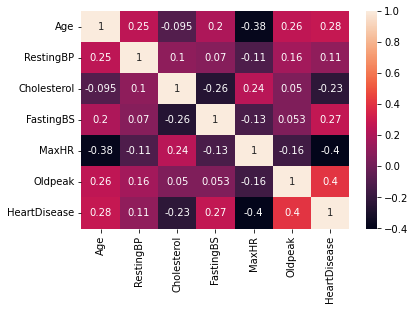

In [44]:
# corr
sn.heatmap(heart.corr(),annot=True)

# most contributing factors to Target=HeartDisease are: OldPeak>Age>FastingBS>RestingBP

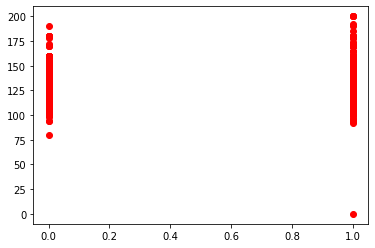

In [6]:
# 

plt.scatter(heart.HeartDisease,heart.RestingBP,color='r')

In [45]:


dummies_data=pd.get_dummies(data=heart,columns=['Sex','ChestPainType','RestingECG','ST_Slope','ExerciseAngina','FastingBS'])
dummies_data

y=dummies_data['HeartDisease']
X=dummies_data.drop(['HeartDisease'],axis='columns')
y
X

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ExerciseAngina_N,ExerciseAngina_Y,FastingBS_0,FastingBS_1
0,40,140,289,172,0.0,0,1,0,1,0,...,0,1,0,0,0,1,1,0,1,0
1,49,160,180,156,1.0,1,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
2,37,130,283,98,0.0,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0
3,48,138,214,108,1.5,1,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
4,54,150,195,122,0.0,0,1,0,0,1,...,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
914,68,144,193,141,3.4,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1
915,57,130,131,115,1.2,0,1,1,0,0,...,0,1,0,0,1,0,0,1,1,0
916,57,130,236,174,0.0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0


In [56]:
# split data
from sklearn.model_selection import train_test_split
# test data is 30% of total dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

y_test

900    1
570    1
791    1
189    1
372    1
      ..
66     0
395    1
355    1
277    1
604    0
Name: HeartDisease, Length: 276, dtype: int64

In [57]:
# USING LOGISTIC REGRESSION

# Train model
# model fit Logistic regression
from sklearn.linear_model import LogisticRegression
heart_mdl= LogisticRegression()

# Train the model 
heart_mdl.fit(X_train,y_train)

C:\Users\rashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
# prediction

y_pred=heart_mdl.predict(X_test)

acc=heart_mdl.score(X_test,y_test)
print(f'The accuracy obtained using Logistic Regression model: {round(acc*100,2)}%')


The accuracy obtained using Logistic Regression model: 88.77%


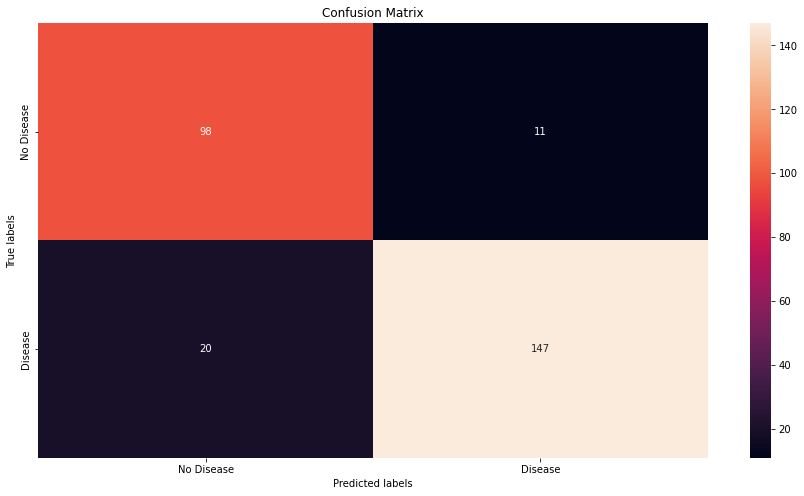

In [59]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
cm

# heatmap
import seaborn as sn

plt.figure(figsize=(15,8))
ax= plt.subplot()

sn.heatmap(cm,annot=True,fmt='g',ax=ax)

# labels
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Disease', 'Disease']); ax.yaxis.set_ticklabels(['No Disease', 'Disease']);

# K Means Clustering (Unsupervised Clustering Algorithm)

In [8]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=2)

# fit 
km.fit(X_train)

# predict
y_pred_km=km.predict(X_test)
y_pred_km


array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

[2568977.990170448, 1509743.037317231, 1116504.5009309626, 930965.7603807871, 819063.7471314351, 713850.2997607341, 655772.3467352511, 603744.088706945, 556340.5502175491]


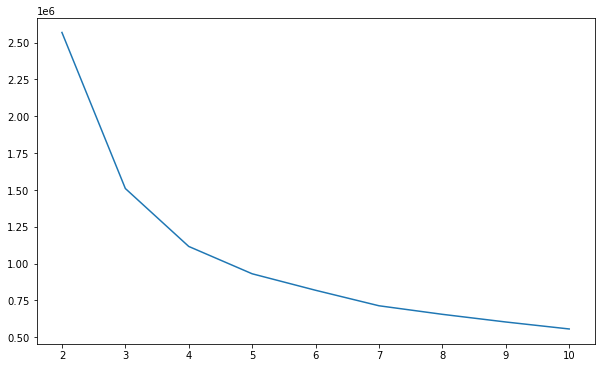

In [18]:
# ELBOW TECHNIQUE TO FIND BEST K VALUE (VALUE CORREPODING TO ELBOW IN THE PLOT(K VS SSE) IS THE BEST K VALUE

sse=[]
k=range(2,11)
for i in range(2,11):
    km_t=KMeans(n_clusters=i)
    km_t.fit(X_train)
    sse_temp=km_t.inertia_
    sse.append(sse_temp)

print(sse)

# plot elbow 
plt.figure(figsize=(10,6))
plt.plot(k,sse)

# Best k value at the elbow (i.e. k=3 here)
#plt.scatter(3,sse[2],color='r',marker='o')

In [18]:
# Multiple Models Run

from sklearn.svm import SVC

models=[LogisticRegression,SVC]
acc=[]

for i in range(len(models)):
    model=models[i]()
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    acc.append(score)
    print(f"Model name:{models[i]} with accuracy of: {score*100}")
    
print(acc)

Model name:<class 'sklearn.linear_model._logistic.LogisticRegression'> with accuracy of: 85.5072463768116
Model name:<class 'sklearn.svm._classes.SVC'> with accuracy of: 71.01449275362319
[0.855072463768116, 0.7101449275362319]


C:\Users\rashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Principle Component Analysis (PCA): Dimensionality Reduction 

In [46]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_sc=sc.fit_transform(X)

X_sc

array([[-1.4331398 ,  0.41090889,  0.82507026, ..., -0.8235563 ,
         0.55134134, -0.55134134],
       [-0.47848359,  1.49175234, -0.17196105, ..., -0.8235563 ,
         0.55134134, -0.55134134],
       [-1.75135854, -0.12951283,  0.7701878 , ..., -0.8235563 ,
         0.55134134, -0.55134134],
       ...,
       [ 0.37009972, -0.12951283, -0.62016778, ...,  1.21424608,
         0.55134134, -0.55134134],
       [ 0.37009972, -0.12951283,  0.34027522, ..., -0.8235563 ,
         0.55134134, -0.55134134],
       [-1.64528563,  0.30282455, -0.21769643, ..., -0.8235563 ,
         0.55134134, -0.55134134]])

In [53]:
from sklearn.decomposition import PCA

pca=PCA(0.95)

X_pca=pca.fit_transform(X_sc)

np.shape(X_pca)

(918, 13)

In [54]:
# split data
from sklearn.model_selection import train_test_split
# test data is 30% of total dataset
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,y,test_size=0.3,random_state=1)

X_test_pca

array([[-1.32945212e+00, -2.23307029e-01,  9.91312947e-01, ...,
        -1.70623765e+00, -2.68686112e+00, -1.22491352e+00],
       [-2.54943866e+00, -5.56034409e-01,  4.00362009e-01, ...,
        -5.13470423e-01, -5.32758073e-01, -3.75768915e-01],
       [-2.62447874e+00, -2.22817216e+00, -1.10510671e+00, ...,
        -2.55320580e-03, -1.05213625e+00, -2.69369280e-01],
       ...,
       [-2.75710828e-01,  7.56423673e-01,  1.63275008e+00, ...,
         5.00233997e-01,  2.43138203e+00,  1.12348565e+00],
       [-2.19346522e+00, -1.65660352e+00, -1.14097413e+00, ...,
         5.66409496e-01, -7.15660439e-01,  9.66069704e-01],
       [-2.90192892e-01,  2.03456639e+00, -2.68941620e-02, ...,
         1.41578932e+00,  9.75336748e-01, -1.40569229e+00]])

In [55]:
# USING LOGISTIC REGRESSION

# Train model
# model fit Logistic regression
from sklearn.linear_model import LogisticRegression
mdl= LogisticRegression()

# Train the model 
mdl.fit(X_train_pca,y_train)

# 
mdl.score(X_test_pca,y_test)

0.8659420289855072